In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('./UNSW_NB15_training-set.csv')



In [2]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scikitplot.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df.shape

(82332, 45)

In [4]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [5]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [6]:
df.dur.value_counts()

0.000009    5546
0.000008    4938
0.000003    4111
0.000004    3336
0.000011    3112
            ... 
0.593260       1
0.025607       1
0.016993       1
0.012860       1
1.106101       1
Name: dur, Length: 39888, dtype: int64

In [7]:
df.dur.describe()

count    82332.000000
mean         1.006756
std          4.710444
min          0.000000
25%          0.000008
50%          0.014138
75%          0.719360
max         59.999989
Name: dur, dtype: float64

In [8]:
df.spkts.value_counts()[:10]

2     36982
10    16386
12     3093
14     2648
16     2489
6      2427
4      1820
8      1409
22     1092
52     1020
Name: spkts, dtype: int64

In [9]:
df.dpkts.value_counts()[:10]

0     36006
8      9465
6      7464
2      5448
10     3746
18     3362
12     2217
4      1411
14     1408
20     1022
Name: dpkts, dtype: int64

In [10]:
df.sbytes.value_counts()

114       18158
200        7187
534        2376
146        2140
1540       1661
          ...  
741474        1
1478          1
5878          1
223189        1
138067        1
Name: sbytes, Length: 4489, dtype: int64

In [11]:
df.sbytes.describe()

count    8.233200e+04
mean     7.993908e+03
std      1.716423e+05
min      2.400000e+01
25%      1.140000e+02
50%      5.340000e+02
75%      1.280000e+03
max      1.435577e+07
Name: sbytes, dtype: float64

In [12]:
df.rate.describe()

count    8.233200e+04
mean     8.241089e+04
std      1.486204e+05
min      0.000000e+00
25%      2.860611e+01
50%      2.650177e+03
75%      1.111111e+05
max      1.000000e+06
Name: rate, dtype: float64

In [13]:

# List of attack categories to drop
attack_categories_to_drop = ['Reconnaissance', 'Backdoor', 'Exploits', 'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']

df = df[~df['attack_cat'].isin(attack_categories_to_drop) | df['attack_cat'].isin(['DoS', 'Normal'])]


# Reset the index
df.reset_index(drop=True, inplace=True)

In [14]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [15]:
df.attack_cat.value_counts()

Normal    37000
DoS        4089
Name: attack_cat, dtype: int64

In [16]:
# Drop irrelevant columns
df = df.drop(['id'], axis=1)

In [17]:
# Replace missing values with NaN
df.replace(' ', np.nan, inplace=True)

In [18]:
# Convert categorical columns to numeric
df['proto'] = df['proto'].astype('category').cat.codes
df['service'] = df['service'].astype('category').cat.codes
df['state'] = df['state'].astype('category').cat.codes


In [19]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,117,0,3,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,117,0,3,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,117,0,3,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,117,0,3,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,117,0,3,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [20]:
# Fill missing values with appropriate values
df['rate'].fillna(df['rate'].median(), inplace=True)
df['dttl'].fillna(df['dttl'].median(), inplace=True)
df['sload'].fillna(df['sload'].median(), inplace=True)
df['dload'].fillna(df['dload'].median(), inplace=True)
df['dpkts'].fillna(df['dpkts'].median(), inplace=True)
df['spkts'].fillna(df['spkts'].median(), inplace=True)


In [21]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,117,0,3,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,117,0,3,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,117,0,3,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,117,0,3,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,117,0,3,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [22]:
df.to_csv('ddos_P.csv')
!copy ddos_P.csv "D:\po"

        1 file(s) copied.


In [23]:
df[df['label']==1]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
243,0.921987,77,0,3,20,0,1280,0,20.607666,254,...,1,2,0,0,0,1,1,0,DoS,1
244,1.173262,111,0,2,16,12,2080,1746,23.012763,254,...,1,1,0,0,0,1,1,0,DoS,1
245,1.438237,111,5,2,10,10,958,2726,13.210619,62,...,1,1,0,0,1,1,1,0,DoS,1
246,1.465404,111,5,2,10,10,800,1018,12.965707,62,...,1,1,0,0,1,1,1,0,DoS,1
247,28.213135,77,0,3,20,0,1280,0,0.673445,254,...,1,1,0,0,0,1,1,0,DoS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24604,0.000004,118,0,3,2,0,200,0,90909.090200,254,...,4,4,0,0,0,8,11,0,DoS,1
24605,1.159325,111,0,2,26,24,3448,3188,42.265974,254,...,1,1,0,0,0,2,1,0,DoS,1
24606,0.656699,111,0,2,10,8,830,1016,25.887050,62,...,1,1,0,0,0,8,9,0,DoS,1
24607,0.235270,111,0,2,10,8,762,960,72.257408,62,...,1,1,0,0,0,1,1,0,DoS,1


Normal    37000
DoS        4089
Name: attack_cat, dtype: int64

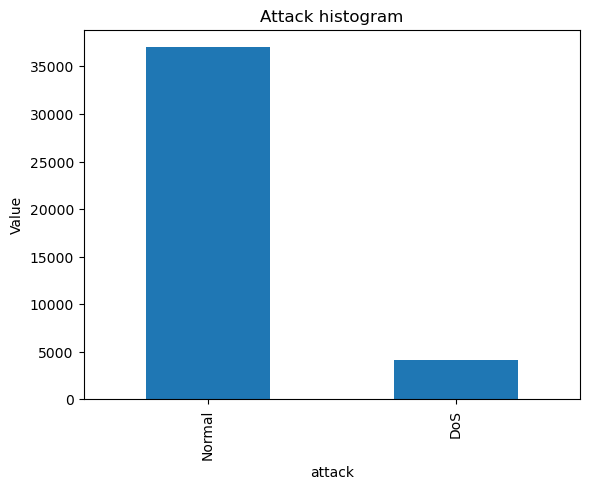

In [24]:
pd.value_counts(df['attack_cat']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack_cat'].value_counts()

In [25]:
df[df['proto']==77]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
243,0.921987,77,0,3,20,0,1280,0,20.607666,254,...,1,2,0,0,0,1,1,0,DoS,1
247,28.213135,77,0,3,20,0,1280,0,0.673445,254,...,1,1,0,0,0,1,1,0,DoS,1
248,28.213135,77,0,3,20,0,1280,0,0.673445,254,...,1,1,0,0,0,1,1,0,DoS,1
249,28.213135,77,0,3,20,0,1280,0,0.673445,254,...,1,1,0,0,0,1,1,0,DoS,1
250,0.466699,77,0,3,18,0,2858,0,36.426047,254,...,1,1,0,0,0,1,1,0,DoS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24408,9.633130,77,0,3,42,0,2688,0,4.256145,254,...,2,2,0,0,0,2,2,0,DoS,1
24413,18.670206,77,0,3,20,0,900,0,1.017664,254,...,2,3,0,0,0,3,3,0,DoS,1
24512,18.670206,77,0,3,20,0,900,0,1.017664,254,...,2,3,0,0,0,3,3,0,DoS,1
24553,23.524111,77,0,3,20,0,1280,0,0.807682,254,...,2,2,0,0,0,2,2,0,DoS,1
